In [1]:
#Checklist before opto stimulation: 
#1) Set tiny black switch on LEDD1B to be on "MOD" (rightmost position)
#2) Make sure power knob on LEDD1B is in on position (Past the click)
#3) Connect MaxWell headstage via HDMI cable to HDMI breakout board
#4) Connect Fiber optic cable to LED and well

In [2]:
#!pip3 install numpy

#!python3.9 -m pip install --upgrade pip

### Import Libraries

In [19]:
import opto_hardware
from opto_hardware import OptoHardware

import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import random


In [20]:
import optogenetics_enviroment as oenv
from optogenetics_enviroment import OptoEnv

In [21]:
import sys         
# appending the directory of maxwell-optogenetics libraries in the sys.path list
sys.path.append('/home/mxwbio/work/maxwell-optogenetics')  

### Hardware & Enviroment Setup

In [22]:
#!ls /home/mxwbio/work/maxwell-optogenetics/Calibration

In [23]:
mwx_path = "/home/mxwbio/work/maxwell-optogenetics/"
#parameters = "Calibration/20221031T103819-ucsc-opto-system-a-470nm-0p35a-v2.csv"
#parameters = "Calibration/20221108T144141-ucsc-opto-system-c-625nm-0p2a-v1.csv"
#parameters = "Calibration/old/20221108T144141-ucsc-opto-system-c-625nm-0p2a-v1.csv"

#parameters = "Calibration/20221031T101718-ucsc-opto-system-b-455nm-1p0a-v1.csv" # UCSF approximation
#parameters = "Calibration/20221031T102003-ucsb-opto-system-a-455nm-0p35a-v1.csv" #UCSB
parameters = "Calibration/20230308T140514-ucsf-opto-system-b_real-530nm-1a-v1.csv"

In [24]:
if oenv.USE_MAXLAB: parameters_file = mwx_path + parameters #Developing on MaxWell computer
else: parameters_file = parameters

if oenv.USE_MAXLAB: recordings_folder = "/home/mxwbio/Data/recordings/opto_stim/"
else: recordings_folder = "/Users/kvoitiuk/maxwell-recordings2" #"./"

print(parameters_file)
opto_env = OptoEnv(parameters_file, recordings_folder, verbose = True, manual_mode = False)


Calibration/20230308T140514-ucsf-opto-system-b_real-530nm-1a-v1.csv
Available USB devices:
('ASRL/dev/cu.wlan-debug::INSTR',
 'ASRL/dev/cu.usbmodem11101::INSTR',
 'ASRL/dev/cu.W1-R::INSTR',
 'ASRL/dev/cu.Bluetooth-Incoming-Port::INSTR')


In [25]:
#arduino_path = "/dev/ttyACM0" #ex: /dev/ttyACM_
arduino_path = "/dev/cu.usbmodem11101" #On Macbook

opto_env.init_arduino(arduino_path)

#If permission error, run:
#sudo chmod 666 /dev/ttyACM0

### Check MaxWell Recording Unit is responsive by changing its LED color 
Note: Color change won't work if a MaxWell chip is not inserted into recording unit.

In [26]:
opto_env.set_maxwell_color(oenv.LIGHT_GREEN)

In [27]:
opto_env.print_maxwell_colors()

LIGHT_BLUE, CYAN, PINK, DARK_BLUE, LIGHT_GREEN, DARK_GREEN, RED, NO_COLOR


### Calculate Power Density conversions here

In [40]:
power_density = opto_env.opto.arduino_setting_to_power_density(0.5)
print(power_density, "mW/mm^2")

31.17691833709677 mW/mm^2


In [29]:
power = opto_env.opto.arduino_setting_to_power(0.08)
print(power, "mW")


0.2143645291879885 mW


In [30]:
arduino_setting = opto_env.opto.power_density_to_arduino_setting(20)
print(arduino_setting, "(fraction of total)")

0.2799857022428589 (fraction of total)


y = 72.26444 * x + -24.62061 * x^2 + 1.19985


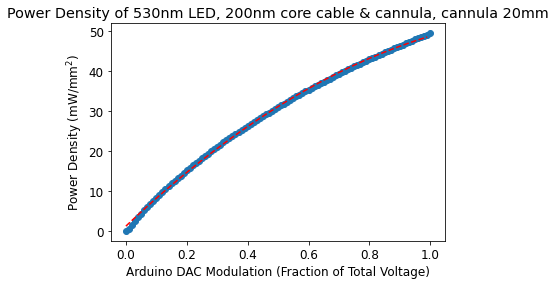

In [31]:
opto_env.opto.plot_power_density_curve()

y = 2.27025 * x + -0.77348 * x^2 + 0.03769


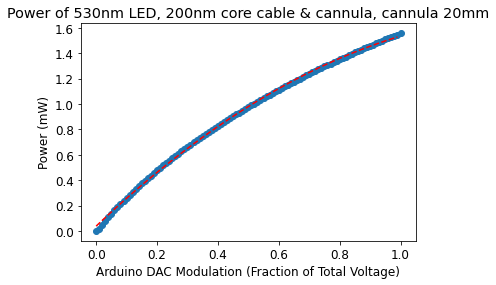

In [32]:
opto_env.opto.plot_power_curve()

In [33]:
print("DAC Range:", opto_env.opto.get_DAC_bitvalue(1))
print("Maximum Power Density setting:", opto_env.opto.arduino_setting_to_power_density(1), "mw/mm^2")
print("DAC Power Density step resolution:", opto_env.opto.arduino_setting_to_power_density(1)/opto_env.opto.DAC_range, "mw/mm^2")

DAC Range: 4095
Maximum Power Density setting: 48.843679957170515 mw/mm^2
DAC Power Density step resolution: 0.011927638573179612 mw/mm^2


In [34]:
# Full details about hardware parameters:
print(opto_env.opto)

OptoHardware parameters for UCSF Opto System B_Real 530nm 1A V1:
{'DAC_range': 4095,
 'LED_wavelength': 530,
 'LED_wavelength_color': '#5EFF00',
 'a': 2.2702542808941986,
 'a_inv': 0,
 'arduino_intensity': 0,
 'arduino_path': '/dev/cu.usbmodem11101',
 'arduino_reply': None,
 'b': -0.773479273684855,
 'b_inv': 0,
 'baud': 115200,
 'c': 0.037694454068035795,
 'c_inv': 0,
 'config_name': 'UCSF Opto System B_Real 530nm 1A V1',
 'fiber_core_diam_um': 200,
 'fiber_len_mm': 20,
 'fiber_numerical_aperture': 0.22,
 'led_docs_max_output_mW_200core': None,
 'link': <pySerialTransfer.pySerialTransfer.SerialTransfer object at 0x14af2ad30>,
 'link_to_led_docs': None,
 'path_to_Thorlabs': None,
 'path_to_csv': 'Calibration/20230308T140514-ucsf-opto-system-b_real-530nm-1a-v1.csv',
 'power_meter': None,
 'ramp': False,
 'ramp_time': 0,
 'rm': <ResourceManager(<PyVisaLibrary('py')>)>,
 'use_maxwell': True,
 'verbose': False,
 'x': [0.0,
       0.01,
       0.02,
       0.03,
       0.04,
       0.05,
  

### Test Functionality

In [1]:
########################################################
from IPython.display import Javascript
display(Javascript('IPython.notebook.execute_cells_above()'))

<IPython.core.display.Javascript object>

In [1]:
!ls . | grep .csv


20230404T172401-2023_04_04_example_opto_stim_log.csv


In [39]:
recording_filename = "20230404T172401-2023_04_04_example_opto_stim_log.csv"
opto_env.set_stim_log(recording_filename)
opto_env.open_stim_log()
opto_env.view_current_stim_log()

recording_filename 20230406T225955-20230404T172401-2023_04_04_hc328_hckcr1-2_3
stim_log_file: /Users/kvoitiuk/maxwell-recordings2/20230406T225955-20230404T172401-2023_04_04_hc328_hckcr1-2_3_opto_stim_log.csv
CSV file is 0
['time (sec)', 'intensity_fraction', 'initial_delay (frames)', 'on_duration (frames)', 'off_duration (frames)', 'notes', 'use_maxwell', 'delta_t (sec)']


In [21]:
#recording_filename = "YOUR_RECORDING_FILENNAME_HERE_25"
recording_filename = "sc1a-YOUR_RECORDING_FILENNAME_HERE_2"
opto_env.set_stim_log(recording_filename)
opto_env.open_stim_log()

recording_filename 20230130T143327-sc1a-YOUR_RECORDING_FILENNAME_HERE_2
stim_log_file: /Users/kvoitiuk/maxwell-recordings2/20230130T143327-sc1a-YOUR_RECORDING_FILENNAME_HERE_2_opto_stim_log.csv
CSV file is 0


In [119]:
opto_env.opto.verbose = False
opto_env.verbose = True
opto_env.opto.use_maxwell_on()

In [120]:
opto_env.opto.set_arduino_intensity(0.1)


In [59]:
opto_env.stim_on()

Stim toggled ON 	 use_maxwell: True 	 arduino_intensity: 0.1


In [60]:
opto_env.stim_off()

Stim toggled OFF 	 use_maxwell: True 	 arduino_intensity: 0.1


Light pulse of specific duration for Maxwell Stiumlation

In [61]:
opto_env.opto.set_arduino_intensity(0)

In [62]:
opto_env.opto.use_maxwell_on()

In [65]:
opto_env.stim_pulse(2000, 2000)

Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.1 	 delay/on/off (frames): 0 / 2000 / 2000


In [66]:
opto_env.opto.set_arduino_intensity(0.1)

In [67]:
opto_env.stim_pulse(4000, 4000)

Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.1 	 delay/on/off (frames): 0 / 4000 / 4000


In [68]:
opto_env.view_current_stim_log()

['time (sec)', 'intensity_fraction', 'initial_delay (frames)', 'on_duration (frames)', 'off_duration (frames)', 'notes', 'use_maxwell', 'delta_t (sec)']
['1675112581.671248', '0.1', '0', '0', '0', 'Single Command ON', 'True', '278.59112000465393']
['1675112584.231909', '0', '0', '0', '0', 'Single Command OFF', 'True', '2.5606610774993896']
['1675112604.4252968', '0', '0', '2000', '2000', '', 'True', '20.193387746810913']
['1675112611.796604', '0.1', '0', '2000', '2000', '', 'True', '7.371307134628296']
['1675112628.094186', '0.1', '0', '4000', '4000', '', 'True', '16.297582149505615']


USE MAXwell: True True
Row: ['1675112581.671248', '0.1', '0', '0', '0', 'Single Command ON', 'True', '278.59112000465393']
Time: 0.0
Plotting params : 0.0 0.1 0.0 2.5606610774993896 0

USE MAXwell: True True
Row: ['1675112584.231909', '0', '0', '0', '0', 'Single Command OFF', 'True', '2.5606610774993896']
Time: 2.5606610774993896
Plotting params : 2.5606610774993896 0.0 0.0 20.193387746810913 0

USE MAXwell: True True
Row: ['1675112604.4252968', '0', '0', '2000', '2000', '', 'True', '20.193387746810913']
Time: 22.754048824310303
Plotting params : 22.754048824310303 0.0 0.0 0.1 0.1

USE MAXwell: True True
Row: ['1675112611.796604', '0.1', '0', '2000', '2000', '', 'True', '7.371307134628296']
Time: 30.1253559589386
Plotting params : 30.1253559589386 0.1 0.0 0.1 0.1

USE MAXwell: True True
Row: ['1675112628.094186', '0.1', '0', '4000', '4000', '', 'True', '16.297582149505615']
Time: 46.422938108444214
Plotting params : 46.422938108444214 0.1 0.0 0.2 0.2



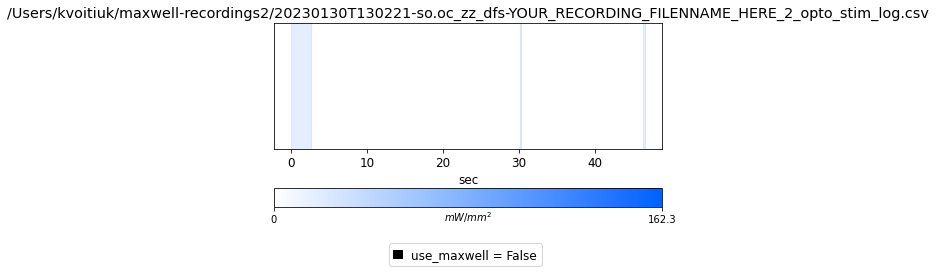

In [69]:
opto_env.plot_log(slicer = slice(0, None))

In [70]:
opto_env.close_stim_log()

In [71]:
#Remove Arduino dependance on MaxWell signal
opto_env.opto.use_maxwell_off()

In [72]:
#Restore Arduino dependance on MaxWell signal
opto_env.opto.use_maxwell_on()

# Stim Experiment: What stimulation parameters do the cells respond to?

## Simple Stim Example
Make MaxWell turn light on, hold, then turn off -- three times

In [86]:
recording_filename = "SimpleStimPattern"
opto_env.set_stim_log(recording_filename)
opto_env.open_stim_log()

recording_filename 20230130T131536-SimpleStimPattern
stim_log_file: /Users/kvoitiuk/maxwell-recordings2/20230130T131536-SimpleStimPattern_opto_stim_log.csv
CSV file is 0


In [87]:
opto_env.opto.use_maxwell_on()

In [88]:
# EXPERIMENT PARAMETERS ------------------
on_duration = 10000 # MaxWell samples  
off_duration = 80000 # MaxWell sampels (20,000 == 1 sec?)

print("Starting experiment!")

# RUN EXPERIMENT --------------
opto_env.opto.set_arduino_intensity(0.2)
opto_env.stim_pulse(on_duration, 80000)
opto_env.stim_pulse(on_duration, 40000)
opto_env.stim_pulse(on_duration, 0)

Starting experiment!
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 10000 / 80000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 10000 / 40000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 10000 / 0


In [ ]:
opto_env.view_current_stim_log()

['time (sec)', 'intensity_fraction', 'initial_delay (frames)', 'on_duration (frames)', 'off_duration (frames)', 'notes', 'use_maxwell', 'delta_t (sec)']
['1669236504.485232', '0.2', '0', '10000', '80000', '', 'True', '0.45020627975463867']
['1669236508.985281', '0.2', '0', '10000', '40000', '', 'True', '4.500048875808716']
['1669236511.485287', '0.2', '0', '10000', '0', '', 'True', '2.5000059604644775']


USE MAXwell: True True
Row: ['1669236504.485232', '0.2', '0', '10000', '80000', '', 'True', '0.45020627975463867']
Time: 0.0
Plotting params : 0.0 0.2 0.0 0.5 4.0

USE MAXwell: True True
Row: ['1669236508.985281', '0.2', '0', '10000', '40000', '', 'True', '4.500048875808716']
Time: 4.500048875808716
Plotting params : 4.500048875808716 0.2 0.0 0.5 2.0

USE MAXwell: True True
Row: ['1669236511.485287', '0.2', '0', '10000', '0', '', 'True', '2.5000059604644775']
Time: 7.000054836273193
Plotting params : 7.000054836273193 0.2 0.0 0.5 0.0



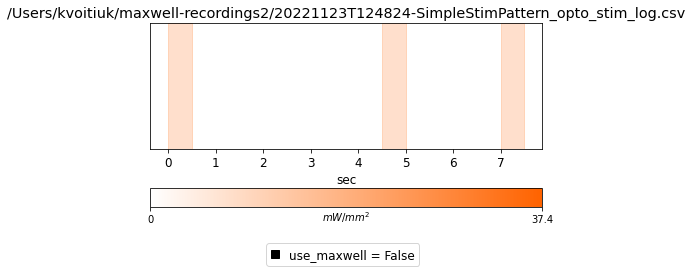

In [ ]:
opto_env.plot_log()

In [ ]:
opto_env.close_stim_log()

## Calibration Experiment 1: Intensity

Fixed frequency, variable intensity 

https://www.pnas.org/doi/10.1073/pnas.0700384104

<div>
<img src="./img/intensity.png" width="500"/>
</div>


 <!--
![title](./img/intensity.png
...-->


In [13]:
recording_filename = "Intensity"
opto_env.set_stim_log(recording_filename)
opto_env.open_stim_log()



recording_filename 20230406T173018-Intensity
stim_log_file: /Users/kvoitiuk/maxwell-recordings2/20230406T173018-Intensity_opto_stim_log.csv
CSV file is 0


In [14]:
# Percent inteisity (Max: ~13.8 mW/mm^2)
test_intensities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

on_duration = 20000 # MaxWell samples  
off_duration = 40000 # MaxWell sampels
num_stims_per_intensity = 1 # times
off_between_conditions = 20000

Run Intensity Sweep experiment:


In [15]:
opto_env.stim_intensity_sweep(test_intensities, on_duration, off_duration, \
                              num_stims_per_intensity, off_between_conditions)

Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.1 	 delay/on/off (frames): 0 / 20000 / 40000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 20000 / 40000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.3 	 delay/on/off (frames): 0 / 20000 / 40000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.4 	 delay/on/off (frames): 0 / 20000 / 40000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.5 	 delay/on/off (frames): 0 / 20000 / 40000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.6 	 delay/on/off (frames): 0 / 20000 / 40000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.7 	 delay/on/off (frames): 0 / 20000 / 40000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.8 	 delay/on/off (frames): 0 / 20000 / 40000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.9 	 delay/on/off (frames): 0 / 20000 / 40000


In [16]:
opto_env.view_current_stim_log()

['time (sec)', 'intensity_fraction', 'initial_delay (frames)', 'on_duration (frames)', 'off_duration (frames)', 'notes', 'use_maxwell', 'delta_t (sec)']
['1680827421.645622', '0.1', '0', '20000', '40000', '', 'True', '44.96293091773987']
['1680827425.645636', '0.2', '0', '20000', '40000', '', 'True', '1.0000061988830566']
['1680827429.666154', '0.3', '0', '20000', '40000', '', 'True', '1.01851487159729']
['1680827433.6661708', '0.4', '0', '20000', '40000', '', 'True', '1.0000107288360596']
['1680827437.6662169', '0.5', '0', '20000', '40000', '', 'True', '1.0000078678131104']
['1680827441.666236', '0.6', '0', '20000', '40000', '', 'True', '1.000006914138794']
['1680827445.666251', '0.7', '0', '20000', '40000', '', 'True', '1.0000088214874268']
['1680827449.666265', '0.8', '0', '20000', '40000', '', 'True', '1.000007152557373']
['1680827453.6662788', '0.9', '0', '20000', '40000', '', 'True', '1.000006914138794']


USE MAXwell: True True
Row: ['1680827421.645622', '0.1', '0', '20000', '40000', '', 'True', '44.96293091773987']
Time: 0.0
Plotting params : 0.0 0.1 0.0 1.0 2.0

USE MAXwell: True True
Row: ['1680827425.645636', '0.2', '0', '20000', '40000', '', 'True', '1.0000061988830566']
Time: 4.000014066696167
Plotting params : 4.000014066696167 0.2 0.0 1.0 2.0

USE MAXwell: True True
Row: ['1680827429.666154', '0.3', '0', '20000', '40000', '', 'True', '1.01851487159729']
Time: 8.02053189277649
Plotting params : 8.02053189277649 0.3 0.0 1.0 2.0

USE MAXwell: True True
Row: ['1680827433.6661708', '0.4', '0', '20000', '40000', '', 'True', '1.0000107288360596']
Time: 12.020548820495605
Plotting params : 12.020548820495605 0.4 0.0 1.0 2.0

USE MAXwell: True True
Row: ['1680827437.6662169', '0.5', '0', '20000', '40000', '', 'True', '1.0000078678131104']
Time: 16.020594835281372
Plotting params : 16.020594835281372 0.5 0.0 1.0 2.0

USE MAXwell: True True
Row: ['1680827441.666236', '0.6', '0', '20000', '

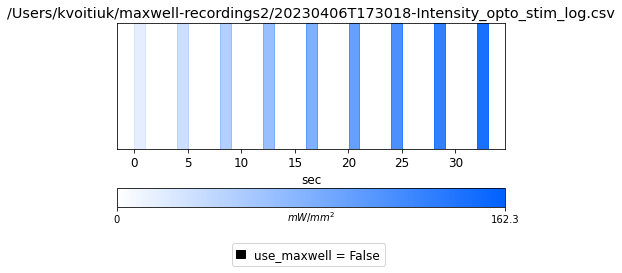

In [17]:
opto_env.plot_log(slicer = slice(0, None), time_scale= "sec")

In [18]:
opto_env.close_stim_log()

## Calibration Experiment 2: Duration

In [121]:
recording_filename = "Duration"
opto_env.set_stim_log(recording_filename)
opto_env.open_stim_log()

recording_filename 20230130T141712-Duration
stim_log_file: /Users/kvoitiuk/maxwell-recordings2/20230130T141712-Duration_opto_stim_log.csv
CSV file is 0


In [122]:
opto_env.opto.verbose = False
opto_env.verbose = True


In [123]:
intensity = 0.2
ms_on_durations = [10, 100, 500, 1000]#, 500, 1000] #ms
ms_off_durations = [100] * len(ms_on_durations)#, 500, 1000] #ms

on_durations = [opto_env.ms_to_frames(ms) for ms in ms_on_durations ]
off_durations = [opto_env.ms_to_frames(ms) for ms in ms_off_durations ]

num_stims_per_duration= 1
off_between_conditions= 20000


opto_env.stim_duration_sweep(intensity, on_durations, off_durations, num_stims_per_duration, off_between_conditions)

Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 200 / 2000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 2000 / 2000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 10000 / 2000
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 20000 / 2000


In [124]:
opto_env.view_current_stim_log()

['time (sec)', 'intensity_fraction', 'initial_delay (frames)', 'on_duration (frames)', 'off_duration (frames)', 'notes', 'use_maxwell', 'delta_t (sec)']
['1675117035.001484', '0.2', '0', '200', '2000', '', 'True', '74.76140189170837']
['1675117036.1172328', '0.2', '0', '2000', '2000', '', 'True', '1.005746841430664']
['1675117037.319197', '0.2', '0', '10000', '2000', '', 'True', '1.0001590251922607']
['1675117038.919212', '0.2', '0', '20000', '2000', '', 'True', '1.0000061988830566']


USE MAXwell: True True
Row: ['1675117035.001484', '0.2', '0', '200', '2000', '', 'True', '74.76140189170837']
Time: 0.0
Plotting params : 0.0 0.2 0.0 10.0 100.0

USE MAXwell: True True
Row: ['1675117036.1172328', '0.2', '0', '2000', '2000', '', 'True', '1.005746841430664']
Time: 1115.7488822937012
Plotting params : 1115.7488822937012 0.2 0.0 100.0 100.0

USE MAXwell: True True
Row: ['1675117037.319197', '0.2', '0', '10000', '2000', '', 'True', '1.0001590251922607']
Time: 2317.7130222320557
Plotting params : 2317.7130222320557 0.2 0.0 500.0 100.0

USE MAXwell: True True
Row: ['1675117038.919212', '0.2', '0', '20000', '2000', '', 'True', '1.0000061988830566']
Time: 3917.7281856536865
Plotting params : 3917.7281856536865 0.2 0.0 1000.0 100.0



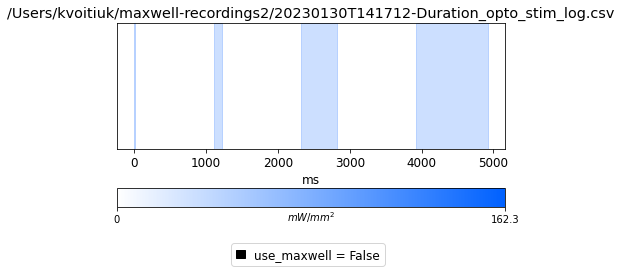

In [125]:
opto_env.plot_log(slicer = slice(0, None), time_scale= "ms")
#opto_env.plot_log()

In [126]:
opto_env.close_stim_log()

## Calibration Experiment 3: Frequency


Fixed intensity, fixed number of stims, variable frequency

https://www.pnas.org/doi/10.1073/pnas.0700384104

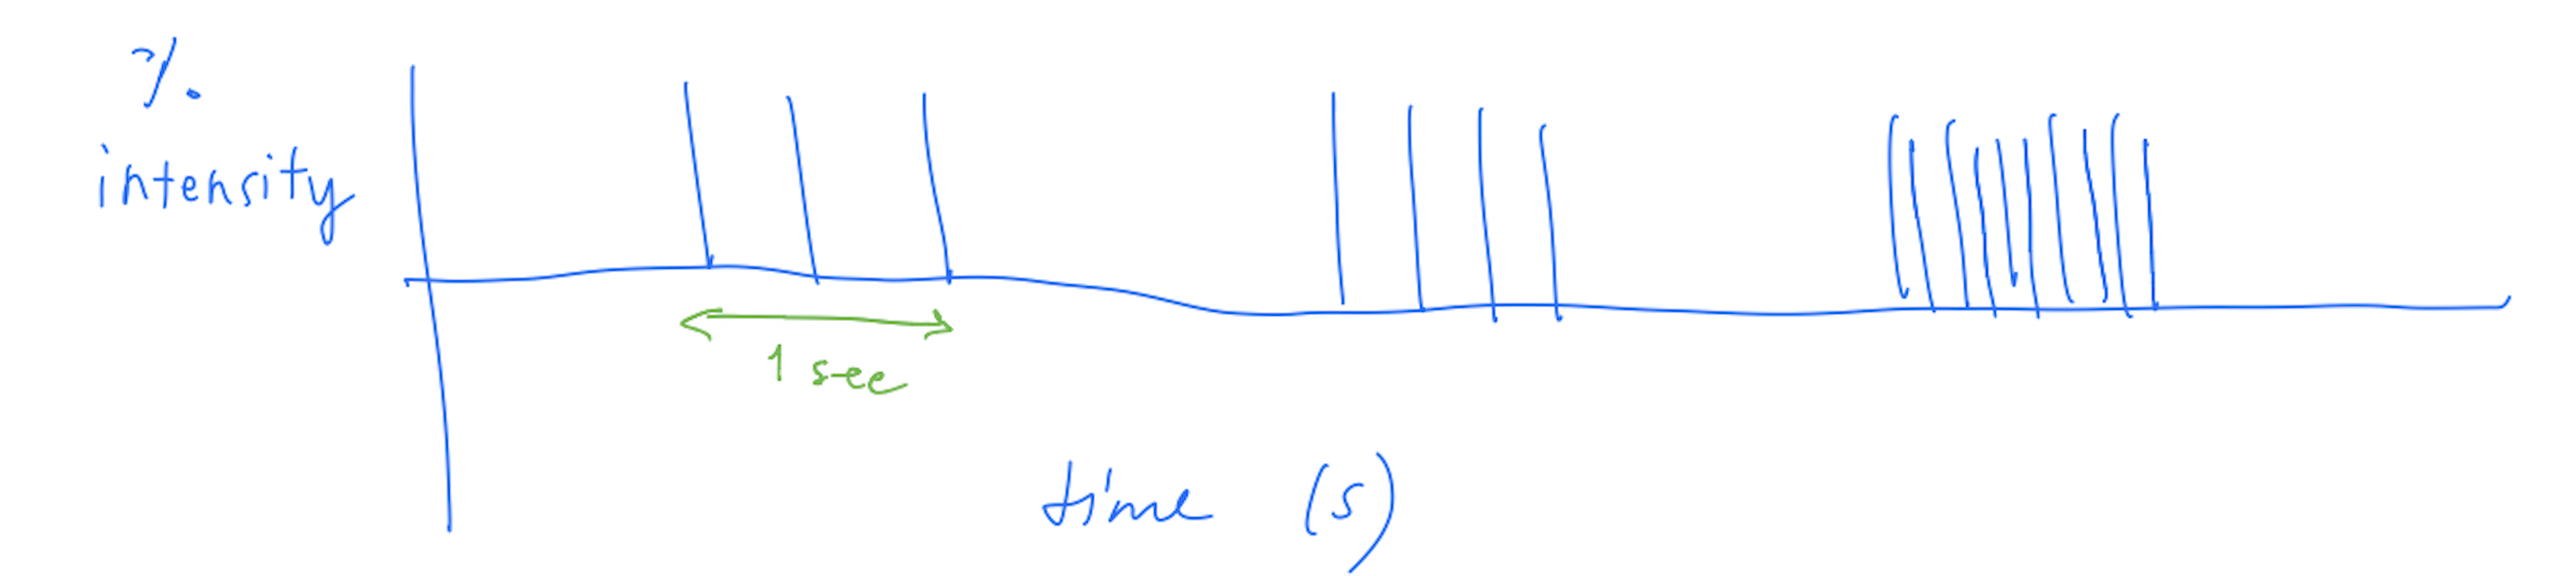

Experiment code to run:

In [19]:
recording_filename = "Frequency"
opto_env.set_stim_log(recording_filename)
opto_env.open_stim_log()

recording_filename 20230130T144637-Frequency
stim_log_file: /Users/kvoitiuk/maxwell-recordings2/20230130T144637-Frequency_opto_stim_log.csv
CSV file is 0


In [22]:
frequency = 20 #hz
dutycycle =  0.5

print(frequency, "Hz to cycle sec:", 1/frequency, "s")

on_duration, off_duration = opto_env.dutycycle_to_duration_sec(frequency, dutycycle)
print(on_duration, "sec ON\t", off_duration, "sec OFF", "\t Total:", (on_duration + off_duration), "sec")

on_duration, off_duration = opto_env.dutycycle_to_duration_frames(frequency, dutycycle)
print(on_duration, "frames ON\t", off_duration, "frames OFF", "\t Total:", (on_duration + off_duration), "frames")


20 Hz to cycle sec: 0.05 s
0.025 sec ON	 0.025 sec OFF 	 Total: 0.05 sec
500 frames ON	 500 frames OFF 	 Total: 1000 frames


In [25]:
intensity = 0.2
frequencies = [1, 5, 10, 20] #[10, 20, 30, 50, 80, 90] #[1, 5, 10, 15, 20, 25, 30, 35, 40, 45] #Hz
duty_cycle = 0.5 #fraction between 0 and 1, 0.6 means in 1 cycle is light is 60% on / 40% off 
on_duration = 1000 #opto_env.ms_to_frames(100) # MaxWell samples
num_stims_per_frequency= 5
off_between_conditions= 2000 #opto_env.sec_to_frames(2)

opto_env.stim_frequency_sweep_num(intensity, on_duration, frequencies, num_stims_per_frequency, off_between_conditions)

ValueError: (1000, '>', 1000, 'on_duration > min(cycle_durations). Please make on_duration smaller, or decesary the freuqency  (increase cycle)')

Fixed intensity, fixed time for stims (i.e. 1 sec), variable frequency

In [137]:
intensity = 0.2
frequencies = [10, 20, 30, 50] #[1, 5, 10, 15, 20, 25, 30, 35, 40, 45] #Hz
on_duration = 200 #opto_env.ms_to_frames(100) # MaxWell samples
time_sec_per_frequency = [0.5] #opto_env.sec_to_frames(2)
off_between_conditions= 2000 #opto_env.sec_to_frames(2)


print(on_duration, off_duration)


200 80000


In [142]:
intensity = 0.2
frequencies = [10, 20, 30, 50] #[1, 5, 10, 15, 20, 25, 30, 35, 40, 45] #Hz
on_duration = 200 #opto_env.ms_to_frames(100) # MaxWell samples
time_sec_per_frequency = [0.5] #opto_env.sec_to_frames(2)
off_between_conditions= 2000 #opto_env.sec_to_frames(2)

opto_env.stim_frequency_sweep_timed(intensity, on_duration, frequencies, time_sec_per_frequency, off_between_conditions)

Frequencies: [10, 20, 30, 50]
On durations 200 Off durations: [1800, 800, 466, 200]
Stim 0.5sec (0.01 min) @ 10 Hz  -(Stims every 0.1 sec)
Start: Mon Jan 30 14:19:36 2023
Stim number: 0
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 200 / 1800
Stim number: 1
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 200 / 1800
Stim number: 2
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 200 / 1800
Stim number: 3
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 200 / 1800
Stim number: 4
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 200 / 1800
Stim number: 5
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 200 / 1800
End: Mon Jan 30 14:19:36 2023
total = 0.5 sec
Stim 0.5sec (0.01 min) @ 20 Hz  -(Stims every 0.05 sec)
Start: Mon Jan 30 14:19:36 2023
Stim number: 6
Stim pulse 	 u

In [139]:
opto_env.view_current_stim_log()

['time (sec)', 'intensity_fraction', 'initial_delay (frames)', 'on_duration (frames)', 'off_duration (frames)', 'notes', 'use_maxwell', 'delta_t (sec)']
['1675117134.860595', '0.2', '0', '200', '1800', '', 'True', '16.796457052230835']
['1675117134.960598', '0.2', '0', '200', '1800', '', 'True', '0.10000300407409668']
['1675117135.0606', '0.2', '0', '200', '1800', '', 'True', '0.10000205039978027']
['1675117135.160602', '0.2', '0', '200', '1800', '', 'True', '0.10000205039978027']
['1675117135.260607', '0.2', '0', '200', '1800', '', 'True', '0.10000491142272949']
['1675117135.460746', '0.2', '0', '200', '800', '', 'True', '0.1000070571899414']
['1675117135.510751', '0.2', '0', '200', '800', '', 'True', '0.05000495910644531']
['1675117135.560755', '0.2', '0', '200', '800', '', 'True', '0.050004005432128906']
['1675117135.610759', '0.2', '0', '200', '800', '', 'True', '0.050004005432128906']
['1675117135.660801', '0.2', '0', '200', '800', '', 'True', '0.050041913986206055']
['1675117135.

USE MAXwell: True True
Row: ['1675117176.076649', '0.2', '0', '200', '1800', '', 'True', '34.09369087219238']
Time: 0.0
Plotting params : 0.0 0.2 0.0 10.0 90.0

USE MAXwell: True True
Row: ['1675117176.176652', '0.2', '0', '200', '1800', '', 'True', '0.10000300407409668']
Time: 100.00300407409668
Plotting params : 100.00300407409668 0.2 0.0 10.0 90.0

USE MAXwell: True True
Row: ['1675117176.276841', '0.2', '0', '200', '1800', '', 'True', '0.1001889705657959']
Time: 200.19197463989258
Plotting params : 200.19197463989258 0.2 0.0 10.0 90.0

USE MAXwell: True True
Row: ['1675117176.376843', '0.2', '0', '200', '1800', '', 'True', '0.10000205039978027']
Time: 300.19402503967285
Plotting params : 300.19402503967285 0.2 0.0 10.0 90.0

USE MAXwell: True True
Row: ['1675117176.4768481', '0.2', '0', '200', '1800', '', 'True', '0.1000051498413086']
Time: 400.19917488098145
Plotting params : 400.19917488098145 0.2 0.0 10.0 90.0

USE MAXwell: True True
Row: ['1675117176.5768561', '0.2', '0', '200'

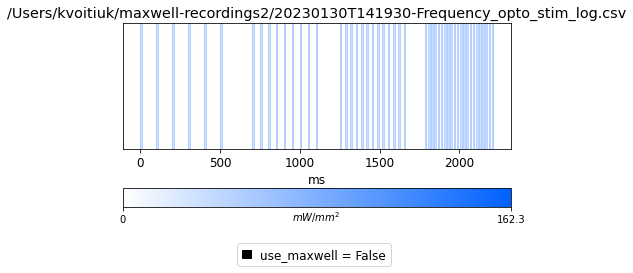

In [143]:
opto_env.plot_log(slicer = slice(0, None), time_scale= "ms")
#opto_env.plot_log()

In [134]:
opto_env.close_stim_log()

## Calibration Experiment 5: Inter-burst Interval

Fixed intensity and frequency, varied spacing between frequency pulses

In [ ]:
recording_filename = "InterBurstInterval"
opto_env.set_stim_log(recording_filename)
opto_env.open_stim_log()

In [ ]:
intensity = 0.2
frequencies = [10, 20, 30, 50] #[1, 5, 10, 15, 20, 25, 30, 35, 40, 45] #Hz
on_duration = 200 #opto_env.ms_to_frames(100) # MaxWell samples
time_sec_per_frequency = [0.5] #opto_env.sec_to_frames(2)
off_between_conditions= 2000 #opto_env.sec_to_frames(2)

opto_env.stim_random(intensity, on_duration, frequencies, time_sec_per_frequency, off_between_conditions)

In [ ]:
opto_env.view_current_stim_log()

In [ ]:
opto_env.plot_log(slicer = slice(0, None), time_scale= "ms")
#opto_env.plot_log()

In [ ]:
opto_env.close_stim_log()

## Limits Test 

In [ ]:
# Intensity (how dim)
# Frequency (how slow)
# For duration (how short)

In [ ]:
# Percent inteisity (Max: ~13.8 mW/mm^2)
time_between_sets = 20000 # MaxWell samples


# RUN EXPERIMENT --------------
for hold_time, num in zip(test_frequency_frames, num_stims): # Sweep intensities
    print("Sweeping ", hold_time, num)
    maxlab.send( maxlab.system.DelaySamples(time_between_sets)) # Let cells recover
    maxlab.send( maxlab.system.DelaySamples(time_between_sets)) # Let cells recover

    for i in range(num):
        maxlab.send( maxlab.system.GPIOOutput(0b11111111)) # On
        maxlab.send( maxlab.system.DelaySamples(hold_time)) # Hold
        maxlab.send( maxlab.system.GPIOOutput(0b00000000)) # Off
        maxlab.send( maxlab.system.DelaySamples(hold_time)) # Hold

In [ ]:
hzs = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45] #Hz
seconds = [1.0, 0.2, 0.1, 0.06666666666666667, 0.05, 0.04, 0.03333333333333333, 0.02857142857142857, 0.025, 0.022222222222222223]
frames = [20000, 4000, 2000, 1333, 1000, 800, 666, 571, 500, 444]


for hz, second, frame in zip(hzs, seconds, frames):
    print(hz, "\t", round(second, 3), "\t\t", frame)

In [ ]:
opto_env.opto.set_arduino_intensity(0.08)
on_duration = 444   #
off_duration = 40000 #2 sec break
#max: 65536

for stim in range(10):
     opto_env.stim_pulse(on_duration, off_duration)

## Calibration Experiment 6: Random Stimulation

In [ ]:
recording_filename = "Random"
opto_env.set_stim_log(recording_filename)
opto_env.open_stim_log()

In [ ]:
intensity = 0.2
frequencies = [10, 20, 30, 50] #[1, 5, 10, 15, 20, 25, 30, 35, 40, 45] #Hz
on_duration = 200 #opto_env.ms_to_frames(100) # MaxWell samples
time_sec_per_frequency = [0.5] #opto_env.sec_to_frames(2)
off_between_conditions= 2000 #opto_env.sec_to_frames(2)

opto_env.stim_random(intensity, on_duration, frequencies, time_sec_per_frequency, off_between_conditions)

In [ ]:
opto_env.view_current_stim_log()

In [ ]:
opto_env.plot_log(slicer = slice(0, None), time_scale= "ms")
#opto_env.plot_log()

In [ ]:
opto_env.close_stim_log()

## End All Experiments

In [ ]:
opto_env.close()